In [1]:
import pandas as pd                                                  #importing data


data=pd.read_csv("water_dataX.csv",encoding="latin")
data = data.drop(["STATION CODE","LOCATIONS","STATE"],axis = 1)

In [2]:
data=data.rename(columns={'D.O. (mg/l)':'do',                           #renaming the columns
                          'PH':'ph',
                          'CONDUCTIVITY (µmhos/cm)':'co',
                          'B.O.D. (mg/l)':'bod',
                          'NITRATENAN N+ NITRITENANN (mg/l)':'na',
                          'TOTAL COLIFORM (MPN/100ml)Mean':'tc',
                          'station':'station',
                          'location':'location',
                          'state':'state',
                          'Temp':'temp'})

In [3]:
data

,temp,do,ph,co,bod,na,FECAL COLIFORM (MPN/100ml),tc,year
0,30.6,6.7,7.5,203,NAN,0.1,11,27,2014
1,29.8,5.7,7.2,189,2,0.2,4953,8391,2014
2,29.5,6.3,6.9,179,1.7,0.1,3243,5330,2014
3,29.7,5.8,6.9,64,3.8,0.5,5382,8443,2014
4,29.5,5.8,7.3,83,1.9,0.4,3428,5500,2014
...,...,...,...,...,...,...,...,...,...
1986,NAN,7.9,738,7.2,2.7,0.518,0.518,202,2003
1987,29,7.5,585,6.3,2.6,0.155,0.155,315,2003
1988,28,7.6,98,6.2,1.2,NAN,NAN,570,2003
1989,28,7.7,91,6.5,1.3,NAN,NAN,562,2003


In [4]:
data.drop(data.columns[[6,8]],axis=1,inplace=True)   

In [5]:
data.describe()

,temp,do,ph,co,bod,na,tc
count,1991,1991,1991,1991,1991,1991,1991
unique,179,166,266,1005,408,507,1095
top,28,6.8,7.2,NAN,1.5,NAN,NAN
freq,241,118,138,25,77,220,121


In [6]:
data.dropna()

,temp,do,ph,co,bod,na,tc
0,30.6,6.7,7.5,203,NAN,0.1,27
1,29.8,5.7,7.2,189,2,0.2,8391
2,29.5,6.3,6.9,179,1.7,0.1,5330
3,29.7,5.8,6.9,64,3.8,0.5,8443
4,29.5,5.8,7.3,83,1.9,0.4,5500
...,...,...,...,...,...,...,...
1986,NAN,7.9,738,7.2,2.7,0.518,202
1987,29,7.5,585,6.3,2.6,0.155,315
1988,28,7.6,98,6.2,1.2,NAN,570
1989,28,7.7,91,6.5,1.3,NAN,562


In [7]:
data.isnull().sum()

temp    0
do      0
ph      0
co      0
bod     0
na      0
tc      0
dtype: int64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1991 entries, 0 to 1990
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   temp    1991 non-null   object
 1   do      1991 non-null   object
 2   ph      1991 non-null   object
 3   co      1991 non-null   object
 4   bod     1991 non-null   object
 5   na      1991 non-null   object
 6   tc      1991 non-null   object
dtypes: object(7)
memory usage: 109.0+ KB


In [9]:
columns_to_convert = ['tc', 'do', 'ph', 'co', 'bod', 'na']                    #converting the datatype of column to numrical
data[columns_to_convert] = data[columns_to_convert].apply(pd.to_numeric, errors='coerce')
# here error ='coerce' is used because if any value which cannot be converted to numeric is converted into NaN

In [10]:
data

,temp,do,ph,co,bod,na,tc
0,30.6,6.7,7.5,203.0,NaN,0.100,27.0
1,29.8,5.7,7.2,189.0,2.0,0.200,8391.0
2,29.5,6.3,6.9,179.0,1.7,0.100,5330.0
3,29.7,5.8,6.9,64.0,3.8,0.500,8443.0
4,29.5,5.8,7.3,83.0,1.9,0.400,5500.0
...,...,...,...,...,...,...,...
1986,NAN,7.9,738.0,7.2,2.7,0.518,202.0
1987,29,7.5,585.0,6.3,2.6,0.155,315.0
1988,28,7.6,98.0,6.2,1.2,NaN,570.0
1989,28,7.7,91.0,6.5,1.3,NaN,562.0


In [11]:
data.describe()

,do,ph,co,bod,na,tc
count,1960.000000,1983.000000,1966.000000,1948.000000,1766.000000,1.859000e+03
mean,6.392637,112.090674,1786.466394,6.940049,1.623079,5.336872e+05
std,1.332938,1878.930716,5552.276223,29.400026,4.090481,1.423428e+07
min,0.000000,0.000000,0.400000,0.100000,0.000000,0.000000e+00
25%,5.900000,6.900000,78.000000,1.200000,0.240000,1.060000e+02
50%,6.700000,7.300000,183.000000,1.896500,0.516000,4.680000e+02
75%,7.200000,7.700000,592.750000,3.600000,1.500000,1.919000e+03
max,11.400000,67115.000000,65700.000000,534.500000,108.700000,5.110909e+08


In [12]:
data_new = data.copy

In [19]:
data_new = pd.DataFrame(data)

In [23]:
data_new

,temp,do,ph,co,bod,na,tc
0,30.6,6.7,7.5,203.0,NaN,0.100,27.0
1,29.8,5.7,7.2,189.0,2.0,0.200,8391.0
2,29.5,6.3,6.9,179.0,1.7,0.100,5330.0
3,29.7,5.8,6.9,64.0,3.8,0.500,8443.0
4,29.5,5.8,7.3,83.0,1.9,0.400,5500.0
...,...,...,...,...,...,...,...
1986,NAN,7.9,738.0,7.2,2.7,0.518,202.0
1987,29,7.5,585.0,6.3,2.6,0.155,315.0
1988,28,7.6,98.0,6.2,1.2,NaN,570.0
1989,28,7.7,91.0,6.5,1.3,NaN,562.0


In [24]:
data_new["ph"].median()

7.3

C:\Users\Kanika\AppData\Local\Temp\ipykernel_17096\2197515977.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_new["ph"])


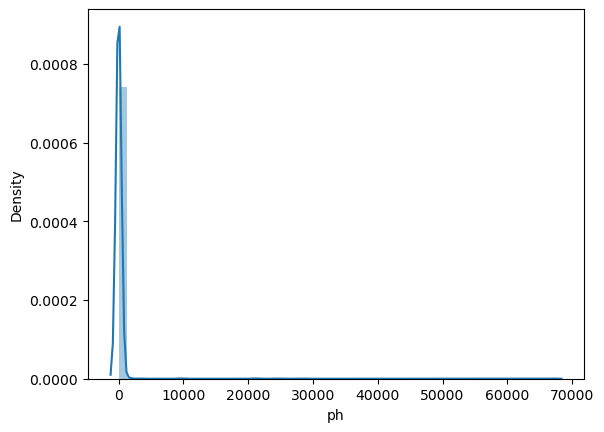

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns                               
sns.distplot(data_new["ph"])
plt.show()

In [26]:
upper_limit = data_new["ph"].quantile(0.99)
upper_limit

501.460000000003

In [27]:
lower_limit=data_new["ph"].quantile(0.01)
lower_limit


5.9

In [28]:
median = data_new["ph"].median()
median

7.3

In [29]:
import numpy as np
data_new["ph"]=np.where(data_new["ph"]>=11,                                # using Winsorization I am replacing the the lower outliers with lower quantile range and replacing with upper outlier with 9 as threshold beacuse when we see the median value then .
                   7.3,
                   np.where(data_new["ph"]<=lower_limit,                   #ideal value of ph is 6.5- 9.5
                           7.3,
                           data_new["ph"]))

C:\Users\Kanika\AppData\Local\Temp\ipykernel_17096\2197515977.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_new["ph"])


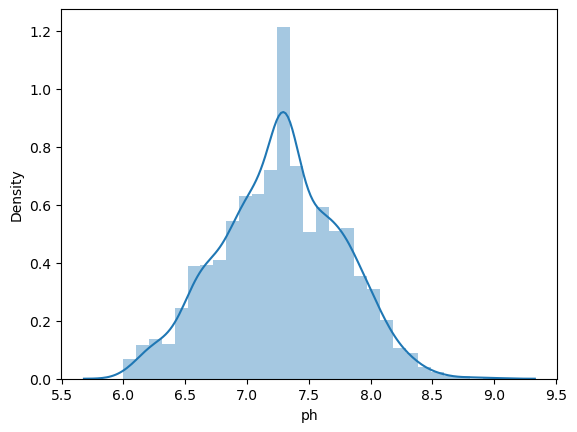

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns                               
sns.distplot(data_new["ph"])
plt.show()

In [31]:
data_new.isnull().sum()

temp      0
do       31
ph        8
co       25
bod      43
na      225
tc      132
dtype: int64

C:\Users\Kanika\AppData\Local\Temp\ipykernel_17096\2718946875.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_new["do"])


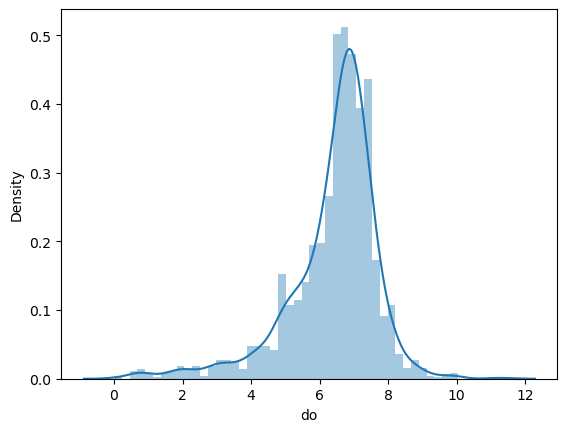

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns                                 # do column is not skewed to remain it as it is.          
sns.distplot(data_new["do"])
plt.show()

C:\Users\Kanika\AppData\Local\Temp\ipykernel_17096\903508817.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_new["co"])


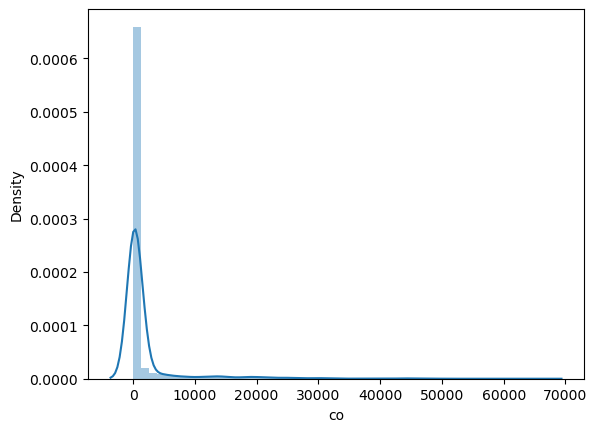

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns                               
sns.distplot(data_new["co"])
plt.show()

In [34]:
lower_limit=data_new["co"].quantile(0.01)
lower_limit

5.965000000000001

In [35]:
upper_limit=data_new["co"].quantile(0.99)
upper_limit

28623.554999999895

In [36]:
data_new["co"].median()

183.0

In [37]:
data_new[data_new["co"]<100].value_counts()

temp  do   ph   co    bod  na     tc     
16    6.4  6.9  61.0  2.6  3.880  538.0      1
28    7.3  6.2  51.0  0.9  0.210  340.0      1
      7.2  6.4  71.0  1.2  0.120  165.0      1
           6.8  58.0  1.5  0.300  556.0      1
                60.0  2.1  0.100  10403.0    1
                                            ..
26.2  6.9  7.2  42.0  0.5  0.180  774.0      1
      6.8  6.6  48.0  0.5  0.440  2025.0     1
      6.6  7.3  45.0  0.6  0.390  940.0      1
26.1  7.7  7.2  44.0  1.0  0.280  148.0      1
NAN   7.9  7.3  7.2   2.7  0.518  202.0      1
Length: 567, dtype: int64

In [38]:
data_new[data_new["co"]>1000].value_counts()

temp  do   ph    co       bod     na     tc     
19    4.8  7.60  1090.0   22.000  3.600  52500.0    1
28.4  6.2  7.00  12342.0  1.400   0.270  1600.0     1
28.5  6.6  7.30  12327.0  0.600   0.710  2210.0     1
      5.8  7.70  1315.0   2.500   0.220  6800.0     1
      5.7  7.40  2323.0   6.300   1.470  541.0      1
                                                   ..
27    6.2  7.40  29920.0  3.600   0.200  41.0       1
      6.5  6.90  12150.0  1.800   0.520  1481.0     1
      6.6  7.10  15158.0  1.100   0.260  810.0      1
      6.7  8.10  2520.0   7.200   1.000  41.0       1
NAN   7.0  8.16  4545.0   4.165   0.343  27550.0    1
Length: 286, dtype: int64

In [39]:
import numpy as np
data_new["co"]=np.where(data_new["co"]>=1500,                                # using Winsorization I am replacing the the lower outliers with lower quantile range and replacing with upper outlier with 9 as threshold beacuse when we see the ideal value then .
                   183,
                   np.where(data_new["co"]<=50,                            #ideal value of c0 to be drinkable is 100-800
                           183,
                           data_new["co"]))

C:\Users\Kanika\AppData\Local\Temp\ipykernel_17096\903508817.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_new["co"])


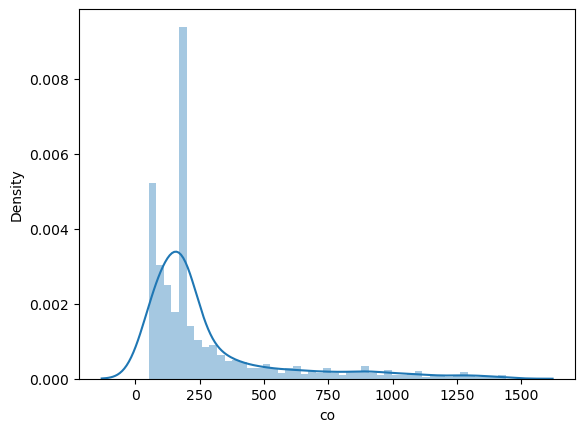

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns                               
sns.distplot(data_new["co"])
plt.show()

C:\Users\Kanika\AppData\Local\Temp\ipykernel_17096\3659760743.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_new["bod"])


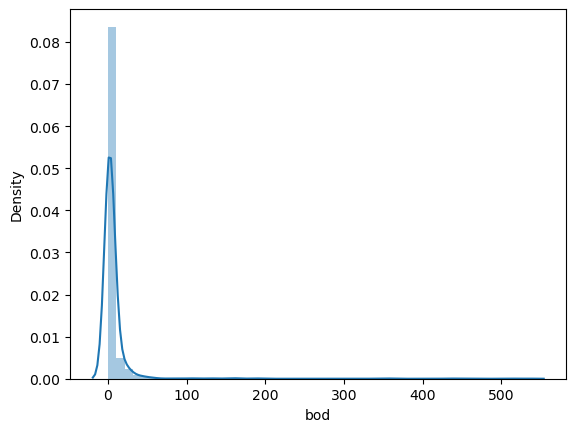

In [41]:
sns.distplot(data_new["bod"])
plt.show()

In [42]:
data_new["bod"].median()

1.8965

In [43]:
data_new["bod"].mean()

6.940048767967146

In [44]:
upper_limit=data_new["bod"].quantile(0.99)
upper_limit

104.17099999999998

In [45]:
lower_limit=data_new["bod"].quantile(0.01)
lower_limit

0.4

In [46]:
fifty = data_new["bod"].quantile(0.50)
fifty

1.8965

In [47]:
data_new[data_new["bod"]>6]

,temp,do,ph,co,bod,na,tc
33,30.6,5.1,7.3,183.0,10.3,1.800,83.0
36,25,5.5,7.4,183.0,7.7,1.100,67.0
37,25.3,5.3,7.7,183.0,9.9,1.200,304.0
39,26.1,3.6,7.4,183.0,31.3,2.200,474.0
41,27.4,5.9,7.4,268.0,6.4,0.400,68.0
...,...,...,...,...,...,...,...
1957,25,7.5,7.3,183.0,6.5,0.514,224.0
1967,23,7.3,7.3,183.0,17.2,NaN,225.0
1968,21,7.5,7.3,183.0,18.5,NaN,247.0
1969,20,6.9,7.3,183.0,6.8,NaN,295.0


In [48]:
import numpy as np
data_new["bod"]=np.where(data_new["bod"]>=6,                                             # using Winsorization I am replacing the the lower outliers with lower quantile range and replacing with upper outlier with 9 as threshold beacuse when we see the ideal value then .
                   1.89, 
                   np.where(data_new["bod"]<=lower_limit,                   #ideal value of bod is less than 5
                           1.89,
                           data_new["bod"]))

C:\Users\Kanika\AppData\Local\Temp\ipykernel_17096\3659760743.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_new["bod"])


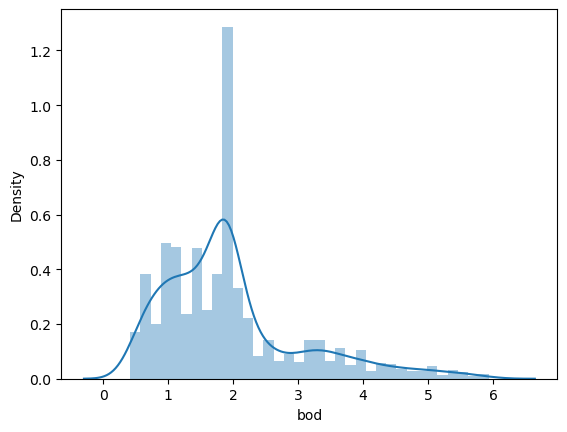

In [49]:
sns.distplot(data_new["bod"])
plt.show()

C:\Users\Kanika\AppData\Local\Temp\ipykernel_17096\963126635.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_new["na"])


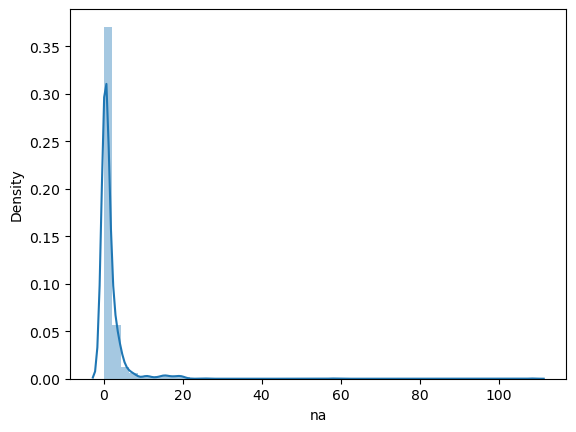

In [50]:
sns.distplot(data_new["na"])
plt.show()

In [51]:
upper_limit=data_new["na"].quantile(0.99)
upper_limit

17.769999999999982

In [52]:
lower_limit=data_new["na"].quantile(0.01)
lower_limit

0.0

In [53]:
data_new["na"].median()

0.516

In [54]:
import numpy as np
data_new["na"]=np.where(data_new["na"]>1,                                # using Winsorization I am replacing the the lower outliers with lower quantile range and replacing with upper outlier with 9 as threshold beacuse when we see the ideal value then .
                   0.516,
                   np.where(data_new["na"]<=lower_limit,
                           0.516,
                           data_new["na"]))

C:\Users\Kanika\AppData\Local\Temp\ipykernel_17096\963126635.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_new["na"])


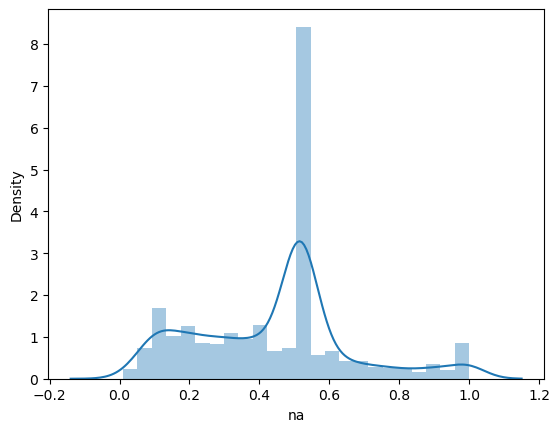

In [55]:
sns.distplot(data_new["na"])
plt.show()

C:\Users\Kanika\AppData\Local\Temp\ipykernel_17096\508975709.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_new["tc"])


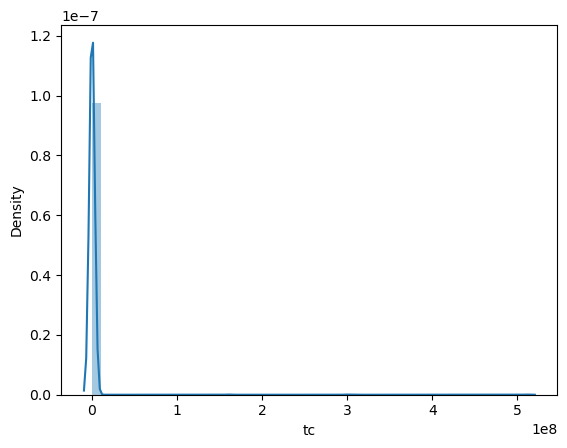

In [56]:
sns.distplot(data_new["tc"])
plt.show()

In [57]:
upper_limit=data_new["tc"].quantile(0.99)
upper_limit

129200.00000000073

In [58]:
lower_limit=data_new["tc"].quantile(0.01)
lower_limit

5.0

In [59]:
data_new["tc"].median()

468.0

In [60]:
data_new.describe()

,do,ph,co,bod,na,tc
count,1960.000000,1983.000000,1966.000000,1948.000000,1766.000000,1.859000e+03
mean,6.392637,7.271753,276.987757,1.946203,0.440459,5.336872e+05
std,1.332938,0.485041,276.938753,1.076422,0.222329,1.423428e+07
min,0.000000,6.000000,51.000000,0.414000,0.010000,0.000000e+00
25%,5.900000,6.931500,112.000000,1.200000,0.266250,1.060000e+02
50%,6.700000,7.300000,183.000000,1.890000,0.516000,4.680000e+02
75%,7.200000,7.600000,298.500000,2.200000,0.516000,1.919000e+03
max,11.400000,9.010000,1440.000000,5.930000,1.000000,5.110909e+08


In [61]:
import numpy as np
data_new["tc"]=np.where(data_new["tc"]>5000,                                # using Winsorization I am replacing the the lower outliers with lower quantile range and replacing with upper outlier with 9 as threshold beacuse when we see the ideal value then .
                   468,
                   np.where(data_new["tc"]<=lower_limit,
                           468,
                           data_new["tc"]))

C:\Users\Kanika\AppData\Local\Temp\ipykernel_17096\508975709.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_new["tc"])


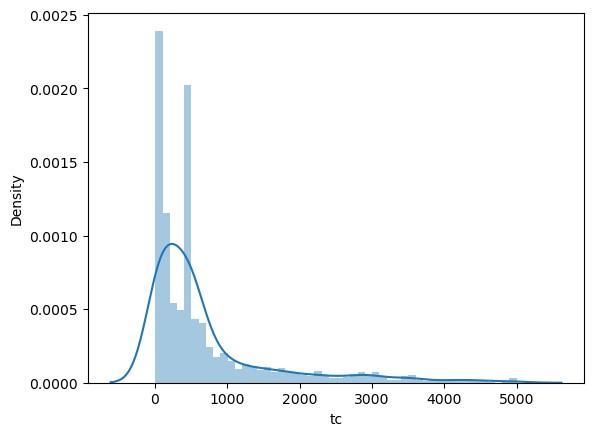

In [62]:
sns.distplot(data_new["tc"])
plt.show()

In [63]:
data_new.isnull().sum()

temp      0
do       31
ph        8
co       25
bod      43
na      225
tc      132
dtype: int64

In [64]:
data_new["do"] = data_new["do"].fillna(data_new["do"].median())
data_new["ph"] = data_new["ph"].fillna(data_new["ph"].median())
data_new["co"] = data_new["co"].fillna(data_new["co"].median())
data_new["bod"] = data_new["bod"].fillna(data_new["bod"].median())
data_new["na"] = data_new["na"].fillna(data_new["na"].median())
data_new["tc"] = data_new["tc"].fillna(data_new["tc"].median())

In [65]:
data_new.isnull().sum()

temp    0
do      0
ph      0
co      0
bod     0
na      0
tc      0
dtype: int64

In [66]:
data_new.describe()

,do,ph,co,bod,na,tc
count,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000,1991.000000
mean,6.397422,7.271867,275.807599,1.944989,0.448996,686.974385
std,1.323062,0.484068,275.392719,1.064760,0.210746,900.026391
min,0.000000,6.000000,51.000000,0.414000,0.010000,6.000000
25%,5.950000,6.936500,113.000000,1.200000,0.300000,126.000000
50%,6.700000,7.300000,183.000000,1.890000,0.516000,468.000000
75%,7.200000,7.600000,291.850000,2.200000,0.516000,679.500000
max,11.400000,9.010000,1440.000000,5.930000,1.000000,5000.000000


In [67]:
data.describe()

,do,ph,co,bod,na,tc
count,1960.000000,1983.000000,1966.000000,1948.000000,1766.000000,1.859000e+03
mean,6.392637,7.271753,1786.466394,6.940049,1.623079,5.336872e+05
std,1.332938,0.485041,5552.276223,29.400026,4.090481,1.423428e+07
min,0.000000,6.000000,0.400000,0.100000,0.000000,0.000000e+00
25%,5.900000,6.931500,78.000000,1.200000,0.240000,1.060000e+02
50%,6.700000,7.300000,183.000000,1.896500,0.516000,4.680000e+02
75%,7.200000,7.600000,592.750000,3.600000,1.500000,1.919000e+03
max,11.400000,9.010000,65700.000000,534.500000,108.700000,5.110909e+08


# Hypothesis testing 

In [116]:
import pandas as pd
from scipy import stats

# Assuming you have two DataFrames named df_before and df_after
# Replace 'df_before' and 'df_after' with your actual DataFrame variables
data = data.apply(pd.to_numeric, errors='coerce')
data_new = data_new.apply(pd.to_numeric, errors='coerce')

# Drop rows with NaN values
data.dropna(inplace=True)
data_new.dropna(inplace=True)
# Get a list of column names from the first DataFrame
columns_before = data.columns

# Get a list of column names from the second DataFrame
columns_after = data_new.columns

# Perform t-tests for corresponding pairs of columns from the two DataFrames
for col_before, col_after in zip(columns_before, columns_after):
    # Extract data from DataFrames
    data_before = data[col_before].values.astype(float)
    data_after = data_new[col_after].values.astype(float)
    min_length = min(len(data_before), len(data_after))
    data_before = data_before[:min_length]
    data_after = data_after[:min_length]
    
    # Perform t-test
    t_statistic, p_value = stats.ttest_rel(data_before, data_after)
    
    # Print results
    print(f"T-test between '{col_before}' in df_before and '{col_after}' in df_after:")
    print("T-statistic:", t_statistic)
    print("P-value:", p_value)
    alpha = 0.05
    if p_value < alpha:
        print("Reject the null hypothesis. There is a significant difference in means between the two columns.")
    else:
        print("Fail to reject the null hypothesis. There is no significant difference in means between the two columns.")
    print()


T-test between 'temp' in df_before and 'temp' in df_after:
T-statistic: -1.0390071968587664
P-value: 0.2989585703190337
Fail to reject the null hypothesis. There is no significant difference in means between the two columns.

T-test between 'do' in df_before and 'do' in df_after:
T-statistic: -0.08429902386857996
P-value: 0.9328292475079106
Fail to reject the null hypothesis. There is no significant difference in means between the two columns.

T-test between 'ph' in df_before and 'ph' in df_after:
T-statistic: 2.1996901235903263
P-value: 0.02797163519796179
Reject the null hypothesis. There is a significant difference in means between the two columns.

T-test between 'co' in df_before and 'co' in df_after:
T-statistic: 12.143435044877586
P-value: 1.6033835917710065e-32
Reject the null hypothesis. There is a significant difference in means between the two columns.

T-test between 'bod' in df_before and 'bod' in df_after:
T-statistic: 6.521086121890412
P-value: 9.337475224672295e-11
Rej

In [60]:
t_statistic, p_value = ttest_rel(means_before_handling_outliers, means_after_handling_outliers)
p_value

0.36157184689578076

In [57]:
performance_diff = np.array(means_before_handling_outliers) - np.array(means_after_handling_outliers)
performance_diff

array([-4.78500000e-03,  1.04819666e+02,  1.55649446e+03,  4.99506000e+00,
        1.17408300e+00,  5.33000226e+05])

In [68]:
data['nph'] = data['ph'].apply(lambda x: (
    100 if (8.5 >= x >= 7)
    else (80 if (8.6 >= x >= 8.5) or (6.9 >= x >= 6.7)
          else (60 if (8.8 >= x >= 8.6) or (6.8 >= x >= 6.7)
                else (40 if (9 >= x >= 8.8) or (6.7 >= x >= 6.5)
                      else 0)
                )
          )
    )
)


In [72]:
data["ndo"]=data.do.apply(lambda x: (100 if (x>=6)
                                    else(80 if(6>=x>=5.1)
                                        else(60 if (5>=x>=4.1)
                                            else(40 if(4>=x>=3)
                                                else 0)))))

In [73]:
data["nco"]=data.tc.apply(lambda x: (100 if (5>=x>=0)
                                    else(80 if(50>=x>=5)
                                        else(60 if (500>=x>=50)
                                            else(40 if(1000>=x>=500)
                                                else 0)))))

In [74]:
data["nbdo"]=data.bod.apply(lambda x: (100 if (3>=x>=0)
                                    else(80 if(6>=x>=3)
                                        else(60 if (80>=x>=6)
                                            else(40 if(125>=x>=80)
                                                else 0)))))

In [75]:
data["nec"]=data.co.apply(lambda x: (100 if (5>=x>=0)
                                    else(80 if(50>=x>=5)
                                        else(60 if (500>=x>=50)
                                            else(40 if(1000>=x>=500)
                                                else 0)))))

In [76]:
data["nna"]=data.na.apply(lambda x: (100 if (20>=x>=0)
                                    else(80 if(50>=x>=20)
                                        else(60 if (100>=x>=50)
                                            else(40 if(200>=x>=100)
                                                else 0)))))

In [77]:
data

,temp,do,ph,co,bod,na,tc,nph,ndo,nco,nbdo,nec,nna
0,30.6,6.7,7.5,203.0,NaN,0.100,27.0,100,100,80,0,60,100
1,29.8,5.7,7.2,189.0,2.0,0.200,8391.0,100,100,0,100,60,100
2,29.5,6.3,6.9,179.0,1.7,0.100,5330.0,80,100,0,100,60,100
3,29.7,5.8,6.9,64.0,3.8,0.500,8443.0,80,100,0,80,60,100
4,29.5,5.8,7.3,83.0,1.9,0.400,5500.0,100,100,0,100,60,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1986,NAN,7.9,7.3,7.2,2.7,0.518,202.0,100,100,60,100,80,100
1987,29,7.5,7.3,6.3,2.6,0.155,315.0,100,100,60,100,80,100
1988,28,7.6,7.3,6.2,1.2,NaN,570.0,100,100,40,100,80,0
1989,28,7.7,7.3,6.5,1.3,NaN,562.0,100,100,40,100,80,0


In [53]:
data["wph"]=data.nph*0.165                        # these weights are pre assigned by 
data["wdo"]=data.ndo*0.281
data["wbdo"]=data.nbdo*0.234
data["wec"]=data.nec*0.009
data["wna"]=data.nna*0.028
data["wco"]=data.nco*0.281
data["wqi"]=data.wph + data.wdo + data.wbdo + data.wec + data.wna + data.wco

In [54]:
data.head()

,STATION CODE,LOCATIONS,STATE,temp,do,ph,co,bod,na,tc,...,nbdo,nec,nna,wph,wdo,wbdo,wec,wna,wco,wqi
0,1393,"DAMANGANGA AT D/S OF MADHUBAN, DAMAN",DAMAN & DIU,30.6,6.7,7.5,203.0,1.89,0.1,27.0,...,100,60,100,16.5,28.1,23.40,0.54,2.8,22.48,93.82
1,1399,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,29.8,5.7,7.2,189.0,2.00,0.2,468.0,...,100,60,100,16.5,28.1,23.40,0.54,2.8,16.86,88.20
2,1475,ZUARI AT PANCHAWADI,GOA,29.5,6.3,6.9,179.0,1.70,0.1,468.0,...,100,60,100,13.2,28.1,23.40,0.54,2.8,16.86,84.90
3,3181,RIVER ZUARI AT BORIM BRIDGE,GOA,29.7,5.8,6.9,183.0,3.80,0.5,468.0,...,80,60,100,13.2,28.1,18.72,0.54,2.8,16.86,80.22
4,3182,RIVER ZUARI AT MARCAIM JETTY,GOA,29.5,5.8,7.3,183.0,1.90,0.4,468.0,...,100,60,100,16.5,28.1,23.40,0.54,2.8,16.86,88.20


In [55]:
data["target"]=data.wqi.apply(lambda x:(1 if (x>75) else 0))

In [56]:
data

,STATION CODE,LOCATIONS,STATE,temp,do,ph,co,bod,na,tc,...,nec,nna,wph,wdo,wbdo,wec,wna,wco,wqi,target
0,1393,"DAMANGANGA AT D/S OF MADHUBAN, DAMAN",DAMAN & DIU,30.6,6.7,7.5,203.0,1.89,0.100,27.0,...,60,100,16.5,28.1,23.40,0.54,2.8,22.48,93.82,1
1,1399,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,29.8,5.7,7.2,189.0,2.00,0.200,468.0,...,60,100,16.5,28.1,23.40,0.54,2.8,16.86,88.20,1
2,1475,ZUARI AT PANCHAWADI,GOA,29.5,6.3,6.9,179.0,1.70,0.100,468.0,...,60,100,13.2,28.1,23.40,0.54,2.8,16.86,84.90,1
3,3181,RIVER ZUARI AT BORIM BRIDGE,GOA,29.7,5.8,6.9,183.0,3.80,0.500,468.0,...,60,100,13.2,28.1,18.72,0.54,2.8,16.86,80.22,1
4,3182,RIVER ZUARI AT MARCAIM JETTY,GOA,29.5,5.8,7.3,183.0,1.90,0.400,468.0,...,60,100,16.5,28.1,23.40,0.54,2.8,16.86,88.20,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1986,1330,"TAMBIRAPARANI AT ARUMUGANERI, TAMILNADU",NAN,NAN,7.9,7.3,183.0,2.70,0.518,202.0,...,60,100,16.5,28.1,23.40,0.54,2.8,16.86,88.20,1
1987,1450,"PALAR AT VANIYAMBADI WATER SUPPLY HEAD WORK, T...",NAN,29,7.5,7.3,183.0,2.60,0.155,315.0,...,60,100,16.5,28.1,23.40,0.54,2.8,16.86,88.20,1
1988,1403,"GUMTI AT U/S SOUTH TRIPURA,TRIPURA",NAN,28,7.6,7.3,183.0,1.20,0.516,570.0,...,60,100,16.5,28.1,23.40,0.54,2.8,11.24,82.58,1
1989,1404,"GUMTI AT D/S SOUTH TRIPURA, TRIPURA",NAN,28,7.7,7.3,183.0,1.30,0.516,562.0,...,60,100,16.5,28.1,23.40,0.54,2.8,11.24,82.58,1


In [57]:
data["target"].value_counts()

1    1524
0     467
Name: target, dtype: int64

In [58]:
data.columns

Index(['STATION CODE', 'LOCATIONS', 'STATE', 'temp', 'do', 'ph', 'co', 'bod',
       'na', 'tc', 'nph', 'ndo', 'nco', 'nbdo', 'nec', 'nna', 'wph', 'wdo',
       'wbdo', 'wec', 'wna', 'wco', 'wqi', 'target'],
      dtype='object')

In [59]:
final_data1=data[["wph","wdo","wbdo","wec","wna","wco","target"]]

In [60]:
final_data1

,wph,wdo,wbdo,wec,wna,wco,target
0,16.5,28.1,23.40,0.54,2.8,22.48,1
1,16.5,28.1,23.40,0.54,2.8,16.86,1
2,13.2,28.1,23.40,0.54,2.8,16.86,1
3,13.2,28.1,18.72,0.54,2.8,16.86,1
4,16.5,28.1,23.40,0.54,2.8,16.86,1
...,...,...,...,...,...,...,...
1986,16.5,28.1,23.40,0.54,2.8,16.86,1
1987,16.5,28.1,23.40,0.54,2.8,16.86,1
1988,16.5,28.1,23.40,0.54,2.8,11.24,1
1989,16.5,28.1,23.40,0.54,2.8,11.24,1


# RANDOM FOREST SCENARIO 1

In [61]:
x=data["wdo"]
y=data["target"]
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train = x_train.values.reshape(-1, 1)
x_test = x_test.values.reshape(-1, 1)
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)
from sklearn.ensemble import RandomForestClassifier
rf1 = RandomForestClassifier(n_estimators=100, random_state=42)
rf1.fit(x_train, y_train)

# Predictions
y_pred = rf1.predict(x_test)
rf1.score(x_test,y_test)

0.7518796992481203

# RANDOM FOREST SCENARIO 2

In [62]:
x=data[["wdo","wph"]]
y=data["target"]
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)
from sklearn.ensemble import RandomForestClassifier
rf2= RandomForestClassifier(n_estimators=10, random_state=42)
rf2.fit(x_train,y_train)
y_pred=rf2.predict(x_test)
rf2.score(x_test,y_test)

0.8043478260869565

# Random Forest Scenario 3

In [63]:
x=data[["wdo","wph","wec"]]
y=data["target"]
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)
from sklearn.ensemble import RandomForestClassifier
rf3= RandomForestClassifier(n_estimators=10, random_state=0)
rf3.fit(x_train,y_train)
y_pred=rf3.predict(x_test)
rf3.score(x_test,y_test)

0.8093645484949833

# Random Forest Scenario 4

In [64]:
x=data[["wdo","wph","wec","wbdo"]]
y=data["target"]
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)
from sklearn.ensemble import RandomForestClassifier
rf4= RandomForestClassifier(n_estimators=10, random_state=0)
rf4.fit(x_train,y_train)
y_pred=rf4.predict(x_test)
rf4.score(x_test,y_test)

0.8070175438596491

# Random Forest Scenario 5

In [65]:
x=data[["wdo","wph","wec","wbdo","wna"]]
y=data["target"]
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)
from sklearn.ensemble import RandomForestClassifier
rf5= RandomForestClassifier(n_estimators=10, random_state=0)
rf5.fit(x_train,y_train)
y_pred=rf5.predict(x_test)
accuracy_rf_5 = rf5.score(x_test,y_test)
accuracy_rf_5

0.7894736842105263

In [66]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
cm=confusion_matrix(y_test,y_pred)
print(cm)
ps_rf_5 =precision_score(y_test,y_pred)
rs_rf_5 =recall_score(y_test,y_pred)
f1_rf_5 =f1_score(y_test,y_pred)
print(f"precision score is {ps_rf_5}")
print(f"recall score is {rs_rf_5}")
print(f"f1 score is {f1_rf_5}")

[[ 17  82]
 [  2 298]]
precision score is 0.7842105263157895
recall score is 0.9933333333333333
f1 score is 0.8764705882352942


# KNN Scenario 1

In [67]:
x=data["wdo"]
y=data["target"]
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train = x_train.values.reshape(-1, 1)
x_test = x_test.values.reshape(-1, 1)
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

from sklearn.neighbors import KNeighborsClassifier
KNN1= KNeighborsClassifier(n_neighbors=5)
KNN1.fit(x_train,y_train)
y_pred=KNN1.predict(x_test)
KNN1.score(x_test,y_test)

0.7591973244147158

In [68]:
x=data[["wdo","wph"]]
y=data["target"]
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

from sklearn.neighbors import KNeighborsClassifier
KNN2= KNeighborsClassifier(n_neighbors=3)
KNN2.fit(x_train,y_train)
y_pred=KNN2.predict(x_test)
KNN2.score(x_test,y_test)

0.7792642140468228

In [69]:
x=data[["wdo","wph","wec"]]
y=data["target"]
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

from sklearn.neighbors import KNeighborsClassifier
KNN3= KNeighborsClassifier(n_neighbors=3)
KNN3.fit(x_train,y_train)
y_pred=KNN3.predict(x_test)
KNN3.score(x_test,y_test)

0.7842809364548495

In [70]:
x=data[["wdo","wph","wec","wbdo"]]
y=data["target"]
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

from sklearn.neighbors import KNeighborsClassifier
KNN4= KNeighborsClassifier(n_neighbors=3)
KNN4.fit(x_train,y_train)
y_pred=KNN4.predict(x_test)
KNN4.score(x_test,y_test)

0.7859531772575251

In [71]:
x=data[["wdo","wph","wec","wbdo","wna"]]
y=data["target"]
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

from sklearn.neighbors import KNeighborsClassifier
KNN4= KNeighborsClassifier(n_neighbors=3)
KNN4.fit(x_train,y_train)
y_pred=KNN4.predict(x_test)
accuracy_knn_5= KNN4.score(x_test,y_test)
accuracy_knn_5

0.7859531772575251

# XGBoost Classifier scenario 1

In [72]:
x=data["wdo"]
y=data["target"]
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train = x_train.values.reshape(-1, 1)
x_test = x_test.values.reshape(-1, 1)
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)
from xgboost import XGBClassifier
xg= XGBClassifier()
xg.fit(x_train,y_train)
y_pred=xg.predict(x_test)
xg.score(x_test,y_test)

0.7591973244147158

In [73]:
x=data[["wdo","wph"]]
y=data["target"]
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)
from xgboost import XGBClassifier
xg= XGBClassifier()
xg.fit(x_train,y_train)
y_pred=xg.predict(x_test)
xg.score(x_test,y_test)

0.8043478260869565

In [74]:
x=data[["wdo","wph","wec"]]
y=data["target"]
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)
from xgboost import XGBClassifier
xg= XGBClassifier()
xg.fit(x_train,y_train)
y_pred=xg.predict(x_test)
xg.score(x_test,y_test)

0.802675585284281

In [75]:
x=data[["wdo","wph","wec","wbdo"]]
y=data["target"]
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)
from xgboost import XGBClassifier
xg= XGBClassifier()
xg.fit(x_train,y_train)
y_pred=xg.predict(x_test)
xg.score(x_test,y_test)

0.8043478260869565

In [76]:
x=data[["wdo","wph","wec","wbdo","wna"]]
y=data["target"]
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)
from xgboost import XGBClassifier
xg= XGBClassifier(objective='binary:logistic', reg_alpha=0.1, reg_lambda=0.1, random_state=42)
xg.fit(x_train,y_train)
y_pred=xg.predict(x_test)
xg.score(x_test,y_test)

0.8043478260869565

In [77]:
x=data[["wdo","wph","wec","wbdo","wna"]]
y=data["target"]
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [78]:
import tensorflow as tf
from tensorflow import keras
model=keras.Sequential([
    keras.layers.Dense(2,input_shape=(5,),
                      activation='sigmoid',
                      kernel_initializer="ones",
                      bias_initializer="zeros")
])
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
model.fit(x_train,y_train,epochs=500)

Epoch 1/500
44/44 [==============================] - 1s 3ms/step - loss: 0.6740 - accuracy: 0.7925
Epoch 2/500
44/44 [==============================] - 0s 3ms/step - loss: 0.6390 - accuracy: 0.8055
Epoch 3/500
44/44 [==============================] - 0s 3ms/step - loss: 0.6095 - accuracy: 0.8055
Epoch 4/500
44/44 [==============================] - 0s 3ms/step - loss: 0.5848 - accuracy: 0.8055
Epoch 5/500
44/44 [==============================] - 0s 3ms/step - loss: 0.5636 - accuracy: 0.8055
Epoch 6/500
44/44 [==============================] - 0s 3ms/step - loss: 0.5460 - accuracy: 0.8055
Epoch 7/500
44/44 [==============================] - 0s 3ms/step - loss: 0.5309 - accuracy: 0.8055
Epoch 8/500
44/44 [==============================] - 0s 3ms/step - loss: 0.5182 - accuracy: 0.8055
Epoch 9/500
44/44 [==============================] - 0s 3ms/step - loss: 0.5078 - accuracy: 0.8062
Epoch 10/500
44/44 [==============================] - 0s 3ms/step - loss: 0.4985 - accuracy: 0.8055
Epoch 11/

44/44 [==============================] - 0s 3ms/step - loss: 0.4526 - accuracy: 0.8055
Epoch 84/500
44/44 [==============================] - 0s 3ms/step - loss: 0.4526 - accuracy: 0.8055
Epoch 85/500
44/44 [==============================] - 0s 3ms/step - loss: 0.4526 - accuracy: 0.8055
Epoch 86/500
44/44 [==============================] - 0s 3ms/step - loss: 0.4526 - accuracy: 0.8055
Epoch 87/500
44/44 [==============================] - 0s 3ms/step - loss: 0.4526 - accuracy: 0.8055
Epoch 88/500
44/44 [==============================] - 0s 3ms/step - loss: 0.4526 - accuracy: 0.8055
Epoch 89/500
44/44 [==============================] - 0s 3ms/step - loss: 0.4526 - accuracy: 0.8055
Epoch 90/500
44/44 [==============================] - 0s 3ms/step - loss: 0.4526 - accuracy: 0.8055
Epoch 91/500
44/44 [==============================] - 0s 3ms/step - loss: 0.4526 - accuracy: 0.8055
Epoch 92/500
44/44 [==============================] - 0s 3ms/step - loss: 0.4526 - accuracy: 0.8055
Epoch 93/500


44/44 [==============================] - 0s 3ms/step - loss: 0.4527 - accuracy: 0.8055
Epoch 246/500
44/44 [==============================] - 0s 3ms/step - loss: 0.4526 - accuracy: 0.8055
Epoch 247/500
44/44 [==============================] - 0s 3ms/step - loss: 0.4527 - accuracy: 0.8055
Epoch 248/500
44/44 [==============================] - 0s 3ms/step - loss: 0.4527 - accuracy: 0.8055
Epoch 249/500
44/44 [==============================] - 0s 3ms/step - loss: 0.4526 - accuracy: 0.8055
Epoch 250/500
44/44 [==============================] - 0s 3ms/step - loss: 0.4526 - accuracy: 0.8055
Epoch 251/500
44/44 [==============================] - 0s 3ms/step - loss: 0.4527 - accuracy: 0.8055
Epoch 252/500
44/44 [==============================] - 0s 3ms/step - loss: 0.4526 - accuracy: 0.8055
Epoch 253/500
44/44 [==============================] - 0s 3ms/step - loss: 0.4526 - accuracy: 0.8055
Epoch 254/500
44/44 [==============================] - 0s 3ms/step - loss: 0.4526 - accuracy: 0.8055
Epoc

44/44 [==============================] - 0s 3ms/step - loss: 0.4526 - accuracy: 0.8055
Epoch 408/500
44/44 [==============================] - 0s 3ms/step - loss: 0.4526 - accuracy: 0.8055
Epoch 409/500
44/44 [==============================] - 0s 3ms/step - loss: 0.4525 - accuracy: 0.8055
Epoch 410/500
44/44 [==============================] - 0s 3ms/step - loss: 0.4527 - accuracy: 0.8055
Epoch 411/500
44/44 [==============================] - 0s 3ms/step - loss: 0.4527 - accuracy: 0.8055
Epoch 412/500
44/44 [==============================] - 0s 3ms/step - loss: 0.4526 - accuracy: 0.8055
Epoch 413/500
44/44 [==============================] - 0s 3ms/step - loss: 0.4526 - accuracy: 0.8055
Epoch 414/500
44/44 [==============================] - 0s 3ms/step - loss: 0.4526 - accuracy: 0.8055
Epoch 415/500
44/44 [==============================] - 0s 3ms/step - loss: 0.4525 - accuracy: 0.8055
Epoch 416/500
44/44 [==============================] - 0s 3ms/step - loss: 0.4526 - accuracy: 0.8055
Epoc

In [90]:
import numpy as np
from scipy.stats import zscore, ttest_1samp
# scipy.stats contains statistical functions, and ttest_rel is used for a paired t-test.
# Simulated performance metrics for two models (replace with your actual data)
model_rf_performance = [75.187, 80.434, 80.936, 80.701, 78.947]
model_knn_performance = [75.919, 77.926, 78.428, 78.595, 78.595]

# Calculate the performance difference
performance_diff = np.array(model_rf_performance) - np.array(model_knn_performance)

# Perform a two-sided z-test
z_statistic, p_value = zscore(performance_diff), ttest_1samp(performance_diff, 0).pvalue

# Set significance level
alpha = 0.05

# Analyze results
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference between the models.")
else:
    print("Fail to reject the null hypothesis. No significant difference observed.")

# Output z-statistic and p-value
print(f"Z-statistic: {z_statistic}, p-value: {p_value}")

Fail to reject the null hypothesis. No significant difference observed.
Z-statistic: [-1.58775124  0.88500112  0.88500112  0.57819666 -0.76044767], p-value: 0.10867607960022217


In [87]:
import numpy as np
from scipy.stats import ttest_rel

# Simulated performance metrics for two models (replace with your actual data)
model_rf_performance = [75.187, 80.434, 80.936, 80.701, 78.947]
model_knn_performance = [75.919, 77.926, 78.428, 78.595, 78.595]

# Calculate the performance difference
performance_diff = np.array(model_rf_performance) - np.array(model_knn_performance)

# Perform a two-sided paired t-test
t_statistic, p_value = ttest_rel(model_rf_performance, model_knn_performance)

# Set significance level
alpha = 0.05

# Analyze results
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference between the models.")
else:
    print("Fail to reject the null hypothesis. No significant difference observed.")

# Output t-statistic and p-value
print(f"T-statistic: {t_statistic}, p-value: {p_value}")

Fail to reject the null hypothesis. No significant difference observed.
T-statistic: 2.0581847408816745, p-value: 0.10867607960022217
